In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [192]:
data_set = pd.read_csv("bank-full.csv")

In [28]:
data_set.shape

(45211, 17)

In [29]:
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Inferences from the 5 point summary:
The count for each attribute is 45211 which gives further validation to our observation that there are no missing values.
For **Age** the 2nd Quartile is very close to the mean, which might illustrate that the distribution it may follow would well be Gaussian.
The Max age of 95, which is considerably greater than the 3rd Quartile of 48 tells us that there would be some outliers in the distribution, given the SD is nearly 10.

For the **Balance** attribute, there might be the presence of even greater number of Outliers as seen by the disparity of the min and the max value.
The SD of 3044 does not go well with the 1st, 2nd and the 3rd Quartile values.

For the **Day** columnm, it suggests that it might be a Gaussian Distribution, where the mean is very close to the 2nd Quartile value.

The **Duration** attribute, The Mean is greater than the value at the half way mark (Q2) which suggest that the distribution would be Left-skewed(Negative Skewness). Also the disparity between the Min value to the Max value and seeing the Mean suggest that there would be a considerable number of Outliers.

The **Campaign** attribute gives us a mean of nearly 3 which is quite close to the Q3 value. This tells us that most customers were contacted at least twice to thrice. 

The **pdays** attribute tells us that the clients have been contacted at an average of 40 days post their last day of communication for a particular campaign,most of the clients have been contacted for a campaign on the same day itself.

The **previous** attribute shows us that for most of the clients there were 0 to 1 prior campaigns done, although there are clients who have been contacted before for campaigns as much as for 275 campaigns.


In [31]:
data_set.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [32]:
#Separating Integer and Object datatypes

Dint = data_set.select_dtypes(include='int64')

print(Dint)

Dobj = data_set.select_dtypes(include='object')

print(Dobj)

       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]
                job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2 

In [33]:
data_set['day']=data_set['day'].astype(object)

In [34]:
data_set.isnull().values.any()

False

In [35]:
print(data_set['age'].isnull().count)

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: age, Length: 45211, dtype: bool>


In [36]:
data_set['job'].isnull().count

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Name: job, Length: 45211, dtype: bool>

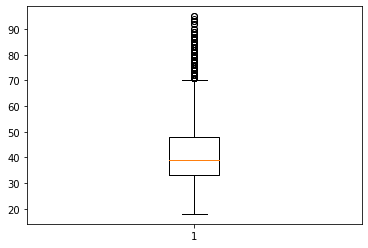

In [33]:
plt.boxplot(data_set['age'])
plt.show()
            

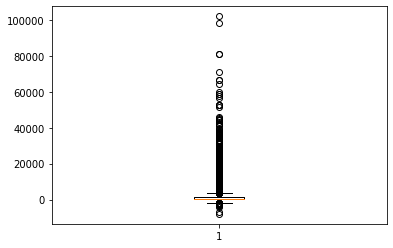

In [40]:
plt.boxplot(data_set['balance'])
plt.show()

The number of Outliers are plenty.

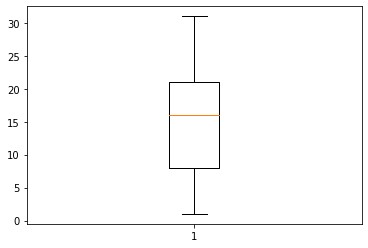

In [41]:
plt.boxplot(data_set['day'])
plt.show()

No outliers seen.

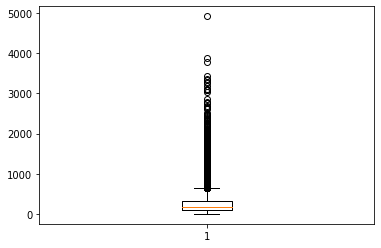

In [42]:
plt.boxplot(data_set['duration'])
plt.show()

The large number of Outliers suggest that there are customers who have not been contacted for a considerable number of days.

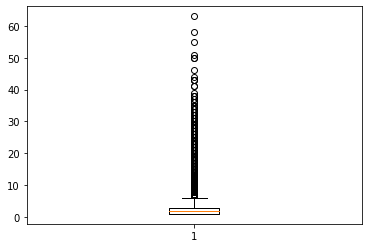

In [43]:
plt.boxplot(data_set['campaign'])
plt.show()

Though most customers were campaigned for 1-3 contacts, but there have been exceptions.

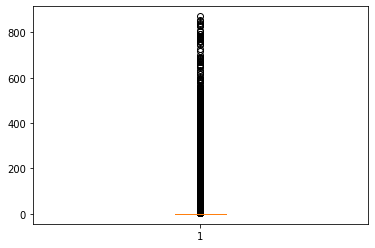

In [46]:
plt.boxplot(data_set['pdays'])
plt.show()

This suggest that although most customers were contacted on the same day itself (drawing the inference from -1), there are customers who have not been contacted for a while.

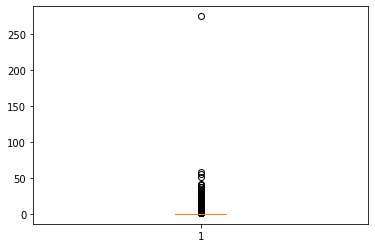

In [47]:
plt.boxplot(data_set['previous'])
plt.show()

Although most customers were not contacted before prior to this campaign, there are Exceptions.

In [47]:
#making a copy from the original data. set
df = data_set.copy

In [114]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data_set['job'] = number.fit_transform(data_set['job'].astype('str'))
data_set['marital'] = number.fit_transform(data_set['marital'].astype('str'))
data_set['education'] = number.fit_transform(data_set['education'].astype('str'))
data_set['default'] = number.fit_transform(data_set['default'].astype('str'))
data_set['housing'] = number.fit_transform(data_set['housing'].astype('str'))
data_set['loan'] = number.fit_transform(data_set['loan'].astype('str'))
data_set['contact'] = number.fit_transform(data_set['contact'].astype('str'))
data_set['month'] = number.fit_transform(data_set['month'].astype('str'))
data_set['poutcome'] = number.fit_transform(data_set['poutcome'].astype('str'))

In [115]:
X = data_set.drop(['Target'], axis =1)
y = data_set[['Target']]

In [116]:
# Dropping of the attribute duration as it greatly affects our Target attribute

data_set = data_set.drop(['duration'], axis =1)
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,no


**Test-Train split**

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6179,34,1,1,1,0,-61,1,0,2,27,8,128,1,-1,0,3
28513,27,9,2,1,0,18,0,0,0,29,4,107,3,-1,0,3
36153,31,9,2,1,0,0,1,0,0,11,8,163,1,370,1,0
43169,67,5,1,0,0,8465,0,0,0,26,3,234,1,-1,0,3
14604,42,4,1,2,0,0,1,0,0,15,5,133,4,-1,0,3


In [62]:
X_train.dtypes

age           int64
job           int64
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day          object
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
dtype: object

In [118]:
y_train.isnull().values.any()

False

                                    ** Training our Logistic Regression model **

In [64]:
# Fit the model on our Training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)


# Get the prediction on the Test data
y_predict = model.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
model_score = model.score(X_train, y_train)
print(model_score)
model_score = model.score(X_test, y_test)
print(model_score)

0.891111321768256
0.8914774402831024


In [74]:
cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[11777   238]
 [ 1226   323]]


Inferences from the confusion matrix:

We have correctly predicted that 11777 are subscribed to the product "Bank Term Deposit"
We also correcty predicted that 323 are not subscribed to the product 
We got incorrect predictions for 1226 , for whom we had actually predicted 'Subscribed' but actually they're not (False Positive aka Type 1 error)
We have got incorrect predictions for 238 clients where we predicted that they were not subscribed but they turned out otherwise. (False Negative or Type II error)

Total errors = 1464

In [83]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     12015
         yes       0.58      0.21      0.31      1549

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



                                 **Training our Naive Bayes Model**

In [75]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
cust_predict = NB_model.predict(X_test)

In [190]:
print("Model Accuracy:{0:4f}".format(metrics.accuracy_score(y_test, cust_predict)))

Model Accuracy:0.834120


So, our model accuracy is 83.2 % when put against Out-of-sample data.

In [88]:
cm1 = metrics.confusion_matrix(y_test, cust_predict)
print(cm1)

[[10589  1426]
 [  843   706]]


So our Combined error(s) are = 2269

In [89]:
print(metrics.classification_report(y_test, cust_predict))

              precision    recall  f1-score   support

          no       0.93      0.88      0.90     12015
         yes       0.33      0.46      0.38      1549

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.64     13564
weighted avg       0.86      0.83      0.84     13564



                                    *Training KNN classifier model*

In [92]:
X_scaled = X.apply(zscore)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.30, random_state=10)

In [95]:
NHH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [96]:
NHH.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [97]:
#Calculating the predicted values on our Test data

cust_predict = NHH.predict(X_test)

In [104]:
NHH.score(X_test, y_test)


0.893320554408729

In [106]:
cm2 = metrics.confusion_matrix(y_test, cust_predict)

In [107]:
print(cm2)

[[11607   399]
 [ 1048   510]]


Inferences from the Confusion Matrix:

We wrongly predicted the outcome of 1048 clients to be subscribed to the 'product' where they we not subscribed. (False Positive or Type I error)
We incorrectly predicted the outcome for 399 clients to be not subscribed where they were subscribed (False Negative or Type II error)
Total errors : 1447


In [111]:
print(metrics.classification_report(y_test, cust_predict))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     12006
         yes       0.56      0.33      0.41      1558

    accuracy                           0.89     13564
   macro avg       0.74      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



Concluding my observations for the Classification models with the assumption that KNN Classifier would be the best suited model, given its Score and the count of the Type I and II errors , Logistic Regression model comes very close with it's model accuracy score nearly same that of KNN. Naive Bayes is seen as the least effective.

                                  **Decision Tree**

In [121]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))

1.0


Decision Trees have this characteristic of Overfitting in the Training Data, in the next step we shall see if the Decision Tree overfits with the Test Data as well?

In [122]:
print(dTree.score(X_test, y_test))

0.8700973164258331


So, our decision tree model is performing rather well on the Training data (Overfitting) and does not perform that well with our Test data.

We would Regularize our decision tree to solve the issue of Overfitting.

In [124]:
dTreeR = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8917116946314027
0.8895606015924507


So, the issue of overfitting is resolved with using a Regularized Decision Tree.

                        Getting the important independent variables 

In [126]:
print(pd.DataFrame(dTreeR.feature_importances_, columns= ["imp"], index =X_train.columns))

                imp
age        0.000000
job        0.000000
marital    0.000000
education  0.000000
default    0.000000
balance    0.000000
housing    0.000000
loan       0.000000
contact    0.028975
day        0.000000
month      0.157012
duration   0.814013
campaign   0.000000
pdays      0.000000
previous   0.000000
poutcome   0.000000


In [170]:
y_predict = dTreeR.predict(X_test)
cm = metrics.confusion_matrix(y_predict, y_test)
print(cm)
print(metrics.classification_report(y_predict, y_test))


[[11627  1120]
 [  378   439]]
              precision    recall  f1-score   support

          no       0.97      0.91      0.94     12747
         yes       0.28      0.54      0.37       817

    accuracy                           0.89     13564
   macro avg       0.63      0.72      0.65     13564
weighted avg       0.93      0.89      0.91     13564



Inferences from the Confusion matrix:

For 378 clients we have incorrectly predicted that they have been subscribed to the product ( Type 1 error or False Positives)
For 1120 clients we have incorrectly predicted that they are not subscribed to the product (Type II error or False Negative)

Total count of errors = 1498


                                         **Ensemble Learning - Bagging**

In [136]:
bgcl = BaggingClassifier(base_estimator = dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
print(bgcl.score(X_train, y_train))

0.999715612854299


In [138]:
print(bgcl.score(X_test, y_test))

0.9043055145974639


Inference:

The Bagging model does also overfits on the Training Data. 

The score on Testing Data is good enough.


In [184]:
bgcl = BaggingClassifier(base_estimator = dTreeR, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test, y_test))

0.8929440389294404
0.8918460631082277


With the Regularized decision tree the problem of overfitting is solved.

In [183]:
y_predict= bgcl.predict(X_test)
cm = metrics.confusion_matrix(y_predict, y_test)
print(cm)
print(metrics.classification_report(y_predict, y_test))

[[11677  1139]
 [  328   420]]
              precision    recall  f1-score   support

          no       0.97      0.91      0.94     12816
         yes       0.27      0.56      0.36       748

    accuracy                           0.89     13564
   macro avg       0.62      0.74      0.65     13564
weighted avg       0.93      0.89      0.91     13564



Inferences from the confusion matrix:

We incorrectly predicted 328 clients to be subscribers to the product. (Type I error or False Positive)

We incorrectly predicted 1139 clients to be not-subsribed to the product (Type II error or False Negative)

Total error count :: 1559 



                    **Ensemble learning: AdaBoost**

In [141]:
abcl = AdaBoostClassifier(base_estimator= dTree, n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8691388970805072


Inference : the model does not overfit on the Test data.

In [143]:
print(abcl.score(X_train, y_train))

1.0


The model however overfits with the Training data as the classifier which we have used is a Decision tree, this would be mitigated if we use a Regularised decision tree.

In [171]:
y_predict = abcl.predict(X_test)
cm = metrics.confusion_matrix(y_predict, y_test)
print(cm)
print(metrics.classification_report(y_predict, y_test))

[[11523   886]
 [  482   673]]
              precision    recall  f1-score   support

          no       0.96      0.93      0.94     12409
         yes       0.43      0.58      0.50      1155

    accuracy                           0.90     13564
   macro avg       0.70      0.76      0.72     13564
weighted avg       0.91      0.90      0.91     13564



In [156]:
abcl = AdaBoostClassifier(base_estimator= dTreeR, n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

0.8991447950457092


In [161]:
print(abcl.score(X_train, y_train))

0.9016968433026827


                                       **Ensemble Learning :Gradient-Boost** 

In [172]:
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.904319524757481
0.9017251548215865


In [175]:
cm = metrics.confusion_matrix(y_predict, y_test)
print(cm)
print(metrics.classification_report(y_predict, y_test))


[[11663   991]
 [  342   568]]
              precision    recall  f1-score   support

          no       0.97      0.92      0.95     12654
         yes       0.36      0.62      0.46       910

    accuracy                           0.90     13564
   macro avg       0.67      0.77      0.70     13564
weighted avg       0.93      0.90      0.91     13564



                                **Ensemble Learning:Random Forest**

In [180]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12, max_depth=3)
rfcl = rfcl.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [181]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))


0.8941315246240047


In [182]:
print(rfcl.score(X_train, y_train))

0.8922804689228047


** This model does not Overfit the Training as well as the Test (Out-of-sample) data.**

                            COMPARISON OF THE ENSEMBLE MODELS WITH THE BASE MODELS

Upon Comparing the Base Model (Decision Tree and Regularised decision tree) with the Ensemble models we get scores which do not have that much disparity among themselves when seen through Training and Test data. The Regularized decision tree resolves the issue of Overfitting in the Base as well as the Ensemble models. The Regularized decision tree performs better than the normal decision tree with 88.95 and 87 score respectively.

Among the Ensemble Techniques, **Bagging** comes up with the best score at 90.43 and **Gradient Boost** comes a close second with 90. When implemented with dTreeR AdaBoost performs rather well at 89.91.

So, if we compare all of these, going by the scores We would go with Bagging as the best suited model.

                            COMPARISON OF ALL THE MODELS

Upon comparison of all the models we see that the **Ensemble Models** perform better than the Classification models. 
**Bagging** has a better score at 90.43 than GradientBoost model which has a score of 90. Random Forest performs consistently over both Training and Test data with score at 89 each.

Among the classification models KNN with a score of 89.33 was the best followed by Logistic Regression at 89.14.